In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets.
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #Exhaustive search over specified parameter values for an estimator.
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import tensorflow as tf
import xgboost as xgb
import os

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Ihj2e31Ipe7X5fnE3V7ntI7nSOOOuOhT')
# print(df.head())
print(df.shape)
# print(df.describe)

(6822, 81)


In [ ]:
x = df.iloc[:,:80].copy()
y = df.iloc[:,80].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(6822, 80)
(6822,)


In [ ]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [ ]:
model_XGB = xgb.XGBClassifier()
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_XGB.fit(x_train, y_train)
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred = model_RF.predict(x_test)
y_p = model_XGB.predict(x_test)
accuracy = accuracy_score(y_test, [q for q in y_pred])
accuracy_p = accuracy_score(y_test, [r for r in y_p])
print("Accuracy for RF: %.2f%%" % (accuracy * 100.0))
print("Accuracy for XGB: %.2f%%" % (accuracy_p * 100.0))

Accuracy for RF: 94.37%
Accuracy for XGB: 91.56%


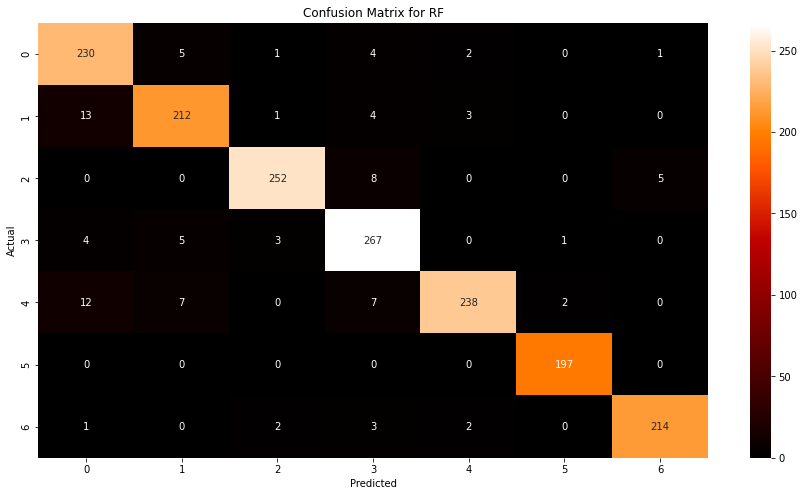

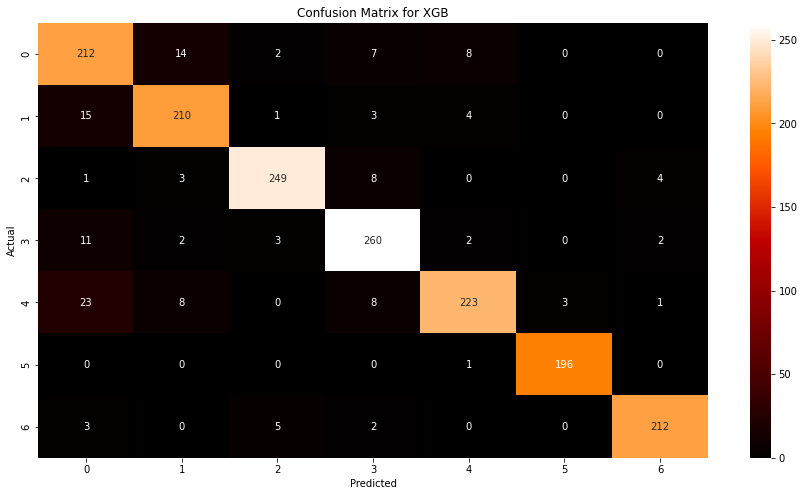

In [ ]:
y_true = np.array(y_test)
y_pred = np.array(model_RF.predict(x_test))
y_pred_xgb = np.array(model_XGB.predict(x_test))

cm = confusion_matrix(y_true, y_pred)
cm_xgb = confusion_matrix(y_true, y_pred_xgb)
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF")
plt.show()
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGB")
plt.show()